In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

import h5py
import os
import time

In [2]:
PATH = 'data_files/datalog_2021_01_29_13_54_29_CST_.h5'

In [3]:
file = h5py.File(PATH, 'r')

In [4]:
packets = file['packets']
packets[:30]

array([(1, 1,  1, 2, 0, 1, 1, 58,  45, 0, 0, 0, 0, 122,  11, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 0, 58,  49, 0, 0, 0, 0, 122,  12, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 1, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 0, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  53, 0, 0, 0, 0, 122,  13, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  57, 0, 0, 0, 0, 122,  14, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
    

In [5]:
np.unique(packets['channel_id'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=uint8)

In [6]:
np.unique(packets['chip_id'])

array([  0,   1,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 116,
       120, 218], dtype=uint8)

In [7]:
np.unique(packets['dataword'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

opening data_files/datalog_2021_01_29_13_54_29_CST_.h5
chip: 11.0	channel: 36.0	rate: 54.00	leakage: 6756.48
chip: 11.0	channel: 44.0	rate: 156.00	leakage: 19518.72
chip: 11.0	channel: 47.0	rate: 142.00	leakage: 17767.04
chip: 11.0	channel: 48.0	rate: 174.00	leakage: 21770.88
chip: 13.0	channel: 56.0	rate: 626.00	leakage: 78325.12
chip: 13.0	channel: 57.0	rate: 335.00	leakage: 41915.20
chip: 13.0	channel: 58.0	rate: 358.00	leakage: 44792.96
chip: 14.0	channel: 0.0	rate: 71.00	leakage: 8883.52
chip: 14.0	channel: 1.0	rate: 82.00	leakage: 10259.84
chip: 14.0	channel: 4.0	rate: 74.00	leakage: 9258.88
chip: 14.0	channel: 5.0	rate: 56.00	leakage: 7006.72
chip: 16.0	channel: 45.0	rate: 92.00	leakage: 11511.04
chip: 17.0	channel: 54.0	rate: 188.00	leakage: 23522.56
chip: 17.0	channel: 56.0	rate: 153.00	leakage: 19143.36
chip: 17.0	channel: 57.0	rate: 72.00	leakage: 9008.64
chip: 18.0	channel: 29.0	rate: 103.00	leakage: 12887.36
chip: 18.0	channel: 30.0	rate: 104.00	leakage: 13012.48
chip: 18.

chip: 82.0	channel: 49.0	rate: 63.00	leakage: 7882.56
chip: 82.0	channel: 56.0	rate: 1282.00	leakage: 160403.84
chip: 82.0	channel: 57.0	rate: 193.00	leakage: 24148.16
chip: 82.0	channel: 59.0	rate: 494.00	leakage: 61809.28
chip: 82.0	channel: 60.0	rate: 102.00	leakage: 12762.24
chip: 82.0	channel: 61.0	rate: 581.00	leakage: 72694.72
chip: 82.0	channel: 63.0	rate: 206.00	leakage: 25774.72
chip: 83.0	channel: 22.0	rate: 56.00	leakage: 7006.72
chip: 91.0	channel: 19.0	rate: 69.00	leakage: 8633.28
chip: 91.0	channel: 50.0	rate: 63.00	leakage: 7882.56
chip: 93.0	channel: 27.0	rate: 96.00	leakage: 12011.52
chip: 93.0	channel: 31.0	rate: 79.00	leakage: 9884.48
chip: 93.0	channel: 48.0	rate: 61.00	leakage: 7632.32
chip: 93.0	channel: 50.0	rate: 85.00	leakage: 10635.20
chip: 93.0	channel: 55.0	rate: 78.00	leakage: 9759.36
chip: 93.0	channel: 59.0	rate: 95.00	leakage: 11886.40
chip: 94.0	channel: 19.0	rate: 72.00	leakage: 9008.64
chip: 95.0	channel: 1.0	rate: 72.00	leakage: 9008.64
chip: 95.0	c

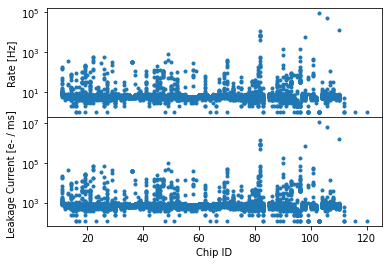

In [8]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import norm, mode
import sys
import time

threshold = 128
gain = 4 # mV /ke-
runtime = 1
lsb = 3.91
#vref = 1.546 V
#vcm = 544 mV

nonrouted_channels = [6,7,8,9,
                      22,23,24,25,
                      38,39,40,
                      54,55,56,57]

def unique_channel_id(io_group, io_channel, chip_id, channel_id):
    return channel_id + 64 * (chip_id + 255 * (io_channel + 255 * (io_group)))

def plot_summary(data):
    parameters = {'axes.labelseize' : 15,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15 }
    plot_exists = plt.fignum_exists('summary')
    if plot_exists:
        fig = plt.figure('summary')
        axes = fig.axes
    else:
        fig,axes = plt.subplots(2, 1, sharex = 'col', num = 'summary')
    fig.subplots_adjust(hspace = 0)

    channels = [(channel // 64) % 255 for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]
    ch_rate = [data[channel]['rate'] for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]
    ch_leakage = [data[channel]['leakage'] for channel in sorted(data.keys()) if channel % 64 not in nonrouted_channels]

    axes[0].plot(channels,ch_rate,'.')
    axes[1].plot(channels,ch_leakage,'.')
    axes[1].set(xlabel = 'Chip ID')
    axes[0].set(ylabel = 'Rate [Hz]')
    axes[1].set(ylabel = 'Leakage Current [e- / ms] ')
    axes[0].set(yscale = 'log')
    axes[1].set(yscale = 'log')
    plt.show()

    

def main():
    global leakage_data_arr
    filename = PATH
    print('opening',filename)
    plt.ion()
    f = h5py.File(filename,'r')
    
    leakage_data_arr = []

    data_mask = f['packets'][:]['packet_type'] == 0
    valid_parity_mask = f['packets'][data_mask]['valid_parity'] == 1
    good_data = (f['packets'][data_mask])[valid_parity_mask]

    io_group = good_data['io_group'].astype(np.uint64)
    io_channel = good_data['io_channel'].astype(np.uint64)
    chip_id = good_data['chip_id'].astype(np.uint64)
    channel_id = good_data['channel_id'].astype(np.uint64)
    unique_channels = set(unique_channel_id(io_group, io_channel, chip_id, channel_id))
    
    data = dict()
    for channel in sorted(unique_channels):
        channel_mask = unique_channel_id(io_group, io_channel, chip_id, channel_id) == channel
        timestamp = good_data[channel_mask]['timestamp']
        adc = good_data[channel_mask]['dataword']
        rate_i = len(adc) / runtime

        data[channel] = dict(
            channel_mask = channel_mask,
            timestamp = timestamp,
            adc = adc,
            rate = rate_i,
            leakage = (rate_i) * threshold * lsb * (1000 / gain) / 1000 # e- / ms
            )
        leakage_data_arr.append([(channel // 64) % 255, channel % 64, data[channel]['rate'], data[channel]['leakage']])
        if rate_i > 50:
            print('chip: {}\tchannel: {}\trate: {:.02f}\tleakage: {:.02f}'.format((channel // 64) % 255, channel % 64, data[channel]['rate'], data[channel]['leakage']))
    return data
                  
if __name__ == '__main__':
    data = main()
    #print(data)
    plot_summary(data)
    #time.sleep(10)

In [9]:
leakage_data_arr = np.array(leakage_data_arr)
leakage_data_arr

array([8.33333333e-03, 1.66666667e-02, 2.50000000e-02, 3.33333333e-02,
       4.16666667e-02, 5.00000000e-02, 5.83333333e-02, 6.66666667e-02,
       7.50000000e-02, 8.33333333e-02, 9.16666667e-02, 1.00000000e-01,
       1.08333333e-01, 1.16666667e-01, 1.25000000e-01, 1.33333333e-01,
       1.41666667e-01, 1.50000000e-01, 1.58333333e-01, 1.66666667e-01,
       1.75000000e-01, 1.83333333e-01, 1.91666667e-01, 2.00000000e-01,
       2.08333333e-01, 2.16666667e-01, 2.25000000e-01, 2.33333333e-01,
       2.41666667e-01, 2.50000000e-01, 2.58333333e-01, 2.66666667e-01,
       2.75000000e-01, 2.83333333e-01, 2.91666667e-01, 3.00000000e-01,
       3.08333333e-01, 3.16666667e-01, 3.25000000e-01, 3.41666667e-01,
       3.50000000e-01, 3.58333333e-01, 3.66666667e-01, 3.83333333e-01,
       3.91666667e-01, 4.00000000e-01, 4.08333333e-01, 4.16666667e-01,
       4.33333333e-01, 4.41666667e-01, 4.50000000e-01, 4.58333333e-01,
       4.66666667e-01, 4.75000000e-01, 4.91666667e-01, 5.00000000e-01,
      

In [10]:
leakage_processed_arr = []

for chip_id in np.unique(leakage_data_arr[:,0]):
    for channel_id in np.unique(leakage_data_arr[:,1]):
        leakage_processed_arr.append([int(chip_id), int(channel_id), 0, 0])
        
for index in leakage_processed_arr:
    for raw_index in leakage_data_arr:
        if ((int(raw_index[0]) == int(index[0])) and (int(raw_index[1]) == int(index[1]))):
            index[2] = raw_index[2]
            index[3] = raw_index[3]

In [11]:
leakage_processed_arr = np.array(leakage_processed_arr)
print(len(np.unique(leakage_processed_arr[:,2])))
print(len(np.unique(leakage_data_arr[:,2])))

193
192


In [17]:
leakage_data_arr[:32]

[[11.0, 0.0, 0.075, 9.384],
 [11.0, 1.0, 0.075, 9.384],
 [11.0, 2.0, 0.075, 9.384],
 [11.0, 3.0, 0.075, 9.384],
 [11.0, 4.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 5.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 6.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 7.0, 0.075, 9.384],
 [11.0, 9.0, 0.041666666666666664, 5.213333333333333],
 [11.0, 10.0, 0.058333333333333334, 7.298666666666667],
 [11.0, 11.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 12.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 13.0, 0.09166666666666666, 11.469333333333333],
 [11.0, 14.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 15.0, 0.058333333333333334, 7.298666666666667],
 [11.0, 16.0, 0.05, 6.256],
 [11.0, 17.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 18.0, 0.08333333333333333, 10.426666666666666],
 [11.0, 19.0, 0.075, 9.384],
 [11.0, 20.0, 0.075, 9.384],
 [11.0, 21.0, 0.06666666666666667, 8.341333333333335],
 [11.0, 22.0, 0.058333333333333334, 7.298666666666667],
 [

In [18]:
leakage_processed_arr[:32]

array([[1.10000000e+01, 0.00000000e+00, 7.50000000e-02, 9.38400000e+00],
       [1.10000000e+01, 1.00000000e+00, 7.50000000e-02, 9.38400000e+00],
       [1.10000000e+01, 2.00000000e+00, 7.50000000e-02, 9.38400000e+00],
       [1.10000000e+01, 3.00000000e+00, 7.50000000e-02, 9.38400000e+00],
       [1.10000000e+01, 4.00000000e+00, 6.66666667e-02, 8.34133333e+00],
       [1.10000000e+01, 5.00000000e+00, 6.66666667e-02, 8.34133333e+00],
       [1.10000000e+01, 6.00000000e+00, 6.66666667e-02, 8.34133333e+00],
       [1.10000000e+01, 7.00000000e+00, 7.50000000e-02, 9.38400000e+00],
       [1.10000000e+01, 8.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+01, 9.00000000e+00, 4.16666667e-02, 5.21333333e+00],
       [1.10000000e+01, 1.00000000e+01, 5.83333333e-02, 7.29866667e+00],
       [1.10000000e+01, 1.10000000e+01, 6.66666667e-02, 8.34133333e+00],
       [1.10000000e+01, 1.20000000e+01, 6.66666667e-02, 8.34133333e+00],
       [1.10000000e+01, 1.30000000e+01, 9.16666667e

In [14]:
chip_id = leakage_processed_arr[:,0].astype(int)
channel_id = leakage_processed_arr[:,1].astype(int)
rate = leakage_processed_arr[:,2]

<ipython-input-42-31e1213e26fa>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, norm = LogNorm(), cmap = cmap, vmin = 1, vmax = 1000)
<ipython-input-42-31e1213e26fa>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.pcolormesh(X, Y, Z, norm = LogNorm(), cmap = cmap, vmin = 1, vmax = 1000)


(0.0, 125.0)

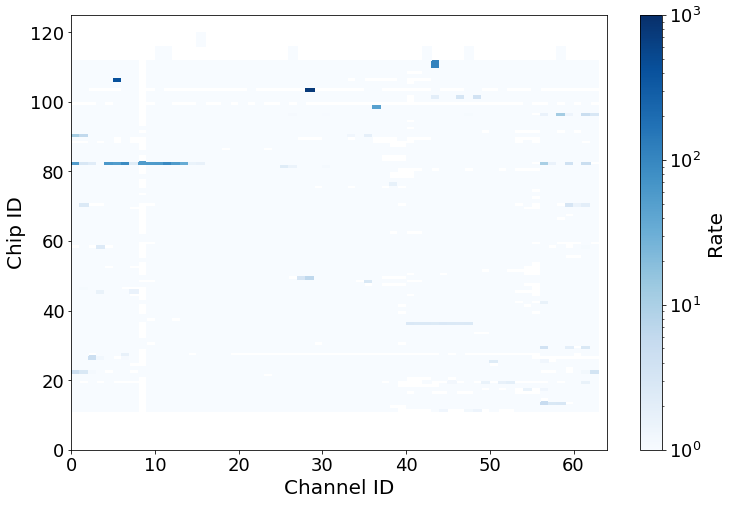

In [42]:
plt.figure(figsize = (12, 8))
cmap = plt.get_cmap('Blues')

x = channel_id
y = chip_id
z = rate

x = np.unique(x)
y = np.unique(y)
X, Y = np.meshgrid(x, y)

Z = z.reshape(len(y), len(x))
#plt.pcolormesh(X, Y, Z, norm = LogNorm(), cmap = cmap, shading = 'auto')
#plt.pcolormesh(X, Y, Z, cmap = cmap)#, vmin=0, vmax=5)
plt.pcolormesh(X, Y, Z, norm = LogNorm(), cmap = cmap, vmin = 1, vmax = 1000)



plt.xlabel("Channel ID", fontsize = 20)
plt.ylabel("Chip ID",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
cb = plt.colorbar()

#cb.ax.tick_params(labelsize=18)

cb.set_label('Rate',fontsize=20)
cb.ax.tick_params(labelsize=18)

plt.xlim(0,64)
plt.ylim(0,125)